In [1]:
#Rizky Wira Pranata
#IF4109
#1301174298

#masukkan library
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
import matplotlib.pyplot as py
import io as io

In [2]:
#untuk membaca file
#df = pd.read_csv('1301174298.csv',' utf-8')
df = pd.read_csv('1301174298.csv', encoding='latin-1', sep=';')

In [3]:
df = df.head(100)
df

,Tweet,Classfy
0,@ridwankamil @dbmpkotabdg kang teman saya tert...,Keluhan
1,@dbmpkotabdg RT @fajriattack: Lapor pak @ridwa...,Keluhan
2,Pa @ridwankamil tempat kerja saya tgl 25 tetep...,Keluhan
3,"@pdamtirtawening@ridwankamil 00106700466, pun...",Keluhan
4,RT @KendiAdiputra: Anak SMA yang ketahuan menc...,Keluhan
5,"Kang @ridwankamil, jalan di Muararajeun Baru, ...",Keluhan
6,RT @AdamMaulud: Didinyamah kieu ?? bosss! Kuma...,Keluhan
7,Pak @ridwankamil punten tolong marahin motor y...,Keluhan
8,RT @iqbalfg: Pak @ridwankamil punten tolong ma...,Keluhan
9,"Pak, tadi saya habis dari Kebun Binatang, itu ...",Keluhan


In [4]:
#menghapus kolom yang kosong
df['Tweet'].replace('', np.nan, inplace=True)
df['Classfy'].replace('', np.nan, inplace=True)

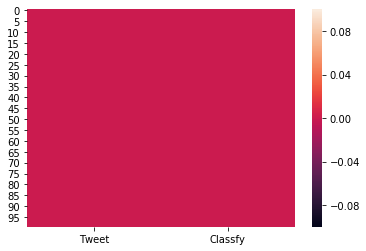

In [5]:
#melihat data kosong 
import seaborn as sns
ax = sns.heatmap(df.isna())

In [6]:
#Mengahpus semua tanda baca dll
df['Tweet1'] = df['Tweet'].str.replace("\r", " ")
df['Tweet1'] = df['Tweet1'].str.replace("\n", " ")
df['Tweet1'] = df['Tweet1'].str.replace("    ", " ")

df['Tweet1'] = df['Tweet1'].str.replace('"', '')

df['Tweet2'] = df['Tweet1'].str.lower()
signs = list("?:!.,;@#")
for punct_sign in signs:
    df['Tweet2'] = df['Tweet2'].str.replace(punct_sign, '')
    
punctuation_signs = list("?:!.,;")
df['Tweet3'] = df['Tweet2']

for punct_sign in punctuation_signs:
    df['Tweet3'] = df['Tweet3'].str.replace(punct_sign, '')
    
# Remove possessive pronouns
df['Tweet4'] = df['Tweet3'].str.replace("'s", "")

df

,Tweet,Classfy,Tweet1,Tweet2,Tweet3,Tweet4
0,@ridwankamil @dbmpkotabdg kang teman saya tert...,Keluhan,@ridwankamil @dbmpkotabdg kang teman saya tert...,ridwankamil dbmpkotabdg kang teman saya tertim...,ridwankamil dbmpkotabdg kang teman saya tertim...,ridwankamil dbmpkotabdg kang teman saya tertim...
1,@dbmpkotabdg RT @fajriattack: Lapor pak @ridwa...,Keluhan,@dbmpkotabdg RT @fajriattack: Lapor pak @ridwa...,dbmpkotabdg rt fajriattack lapor pak ridwankam...,dbmpkotabdg rt fajriattack lapor pak ridwankam...,dbmpkotabdg rt fajriattack lapor pak ridwankam...
2,Pa @ridwankamil tempat kerja saya tgl 25 tetep...,Keluhan,Pa @ridwankamil tempat kerja saya tgl 25 tetep...,pa ridwankamil tempat kerja saya tgl 25 tetep ...,pa ridwankamil tempat kerja saya tgl 25 tetep ...,pa ridwankamil tempat kerja saya tgl 25 tetep ...
3,"@pdamtirtawening@ridwankamil 00106700466, pun...",Keluhan,"@pdamtirtawening@ridwankamil 00106700466, pun...",pdamtirtaweningridwankamil 00106700466 punten...,pdamtirtaweningridwankamil 00106700466 punten...,pdamtirtaweningridwankamil 00106700466 punten...
4,RT @KendiAdiputra: Anak SMA yang ketahuan menc...,Keluhan,RT @KendiAdiputra: Anak SMA yang ketahuan menc...,rt kendiadiputra anak sma yang ketahuan mencur...,rt kendiadiputra anak sma yang ketahuan mencur...,rt kendiadiputra anak sma yang ketahuan mencur...
5,"Kang @ridwankamil, jalan di Muararajeun Baru, ...",Keluhan,"Kang @ridwankamil, jalan di Muararajeun Baru, ...",kang ridwankamil jalan di muararajeun baru bar...,kang ridwankamil jalan di muararajeun baru bar...,kang ridwankamil jalan di muararajeun baru bar...
6,RT @AdamMaulud: Didinyamah kieu ?? bosss! Kuma...,Keluhan,RT @AdamMaulud: Didinyamah kieu ?? bosss! Kuma...,rt adammaulud didinyamah kieu bosss kumaha pa...,rt adammaulud didinyamah kieu bosss kumaha pa...,rt adammaulud didinyamah kieu bosss kumaha pa...
7,Pak @ridwankamil punten tolong marahin motor y...,Keluhan,Pak @ridwankamil punten tolong marahin motor y...,pak ridwankamil punten tolong marahin motor yg...,pak ridwankamil punten tolong marahin motor yg...,pak ridwankamil punten tolong marahin motor yg...
8,RT @iqbalfg: Pak @ridwankamil punten tolong ma...,Keluhan,RT @iqbalfg: Pak @ridwankamil punten tolong ma...,rt iqbalfg pak ridwankamil punten tolong marah...,rt iqbalfg pak ridwankamil punten tolong marah...,rt iqbalfg pak ridwankamil punten tolong marah...
9,"Pak, tadi saya habis dari Kebun Binatang, itu ...",Keluhan,"Pak, tadi saya habis dari Kebun Binatang, itu ...",pak tadi saya habis dari kebun binatang itu ke...,pak tadi saya habis dari kebun binatang itu ke...,pak tadi saya habis dari kebun binatang itu ke...


In [7]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


------------------------------------------------------------


[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [9]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['Tweet4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [10]:
df['Tweet5'] = lemmatized_text_list

In [11]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [13]:
stop_words[0:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [14]:
df['Tweet6'] = df['Tweet5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Tweet6'] = df['Tweet6'].str.replace(regex_stopword, '')

In [15]:
list_columns = ["Tweet", "Classfy", "Tweet6"]
df = df[list_columns]

df = df.rename(columns={'Tweet6': 'Tweet_Parsed'})
df

,Tweet,Classfy,Tweet_Parsed
0,@ridwankamil @dbmpkotabdg kang teman saya tert...,Keluhan,ridwankamil dbmpkotabdg kang teman saya tertim...
1,@dbmpkotabdg RT @fajriattack: Lapor pak @ridwa...,Keluhan,dbmpkotabdg rt fajriattack lapor pak ridwankam...
2,Pa @ridwankamil tempat kerja saya tgl 25 tetep...,Keluhan,pa ridwankamil tempat kerja saya tgl 25 tetep ...
3,"@pdamtirtawening@ridwankamil 00106700466, pun...",Keluhan,pdamtirtaweningridwankamil 00106700466 punten...
4,RT @KendiAdiputra: Anak SMA yang ketahuan menc...,Keluhan,rt kendiadiputra anak sma yang ketahuan mencur...
5,"Kang @ridwankamil, jalan di Muararajeun Baru, ...",Keluhan,kang ridwankamil jalan di muararajeun baru bar...
6,RT @AdamMaulud: Didinyamah kieu ?? bosss! Kuma...,Keluhan,rt adammaulud didinyamah kieu boss kumaha pak...
7,Pak @ridwankamil punten tolong marahin motor y...,Keluhan,pak ridwankamil punten tolong marahin motor yg...
8,RT @iqbalfg: Pak @ridwankamil punten tolong ma...,Keluhan,rt iqbalfg pak ridwankamil punten tolong marah...
9,"Pak, tadi saya habis dari Kebun Binatang, itu ...",Keluhan,pak tadi saya habis dari kebun binatang itu ke...


In [16]:
from nltk.tokenize import word_tokenize
tokens = nltk.tokenize.word_tokenize(str(df['Tweet_Parsed']))
display(tokens)

['0',
 'ridwankamil',
 'dbmpkotabdg',
 'kang',
 'teman',
 'saya',
 'tertim',
 '...',
 '1',
 'dbmpkotabdg',
 'rt',
 'fajriattack',
 'lapor',
 'pak',
 'ridwankam',
 '...',
 '2',
 'pa',
 'ridwankamil',
 'tempat',
 'kerja',
 'saya',
 'tgl',
 '25',
 'tetep',
 '...',
 '3',
 'pdamtirtaweningridwankamil',
 '00106700466',
 'punten',
 '...',
 '4',
 'rt',
 'kendiadiputra',
 'anak',
 'sma',
 'yang',
 'ketahuan',
 'mencur',
 '...',
 '5',
 'kang',
 'ridwankamil',
 'jalan',
 'di',
 'muararajeun',
 'baru',
 'bar',
 '...',
 '6',
 'rt',
 'adammaulud',
 'didinyamah',
 'kieu',
 'boss',
 'kumaha',
 'pak',
 '...',
 '7',
 'pak',
 'ridwankamil',
 'punten',
 'tolong',
 'marahin',
 'motor',
 'yg',
 '...',
 '8',
 'rt',
 'iqbalfg',
 'pak',
 'ridwankamil',
 'punten',
 'tolong',
 'marah',
 '...',
 '9',
 'pak',
 'tadi',
 'saya',
 'habis',
 'dari',
 'kebun',
 'binatang',
 'itu',
 'ke',
 '...',
 '10',
 'rt',
 'tadjiuinbdg',
 'ridwankamil',
 'lapor',
 'pak',
 'mobil',
 'ni',
 '...',
 '11',
 'bonbin',
 'bandung',
 'agak

In [17]:
#vectorization dengan menggunakan TF-IDF 
vectorizer = TfidfVectorizer()
vectorizer.fit(df['Tweet_Parsed'])
display(vectorizer.vocabulary_)
display(vectorizer.idf_)

{'ridwankamil': 577,
 'dbmpkotabdg': 170,
 'kang': 313,
 'teman': 688,
 'saya': 607,
 'tertimpa': 698,
 'pohn': 554,
 'dijln': 184,
 'sangkuriang': 599,
 'dpn': 211,
 'polsek': 557,
 'coblong': 157,
 'tlg': 711,
 'ditertibkan': 202,
 'phn': 546,
 'yg': 756,
 'sdh': 613,
 'lapuknuhun': 378,
 'rt': 586,
 'fajriattack': 219,
 'lapor': 376,
 'pak': 510,
 'lampu': 372,
 'penerangan': 534,
 'jalan': 276,
 'depan': 174,
 'kampus': 311,
 'lpkia': 402,
 'ngaplek': 476,
 'https': 256,
 'tco': 682,
 'rnsu5cqhuq': 582,
 'pa': 504,
 'tempat': 691,
 'kerja': 341,
 'tgl': 702,
 '25': 12,
 'tetep': 699,
 'masuk': 421,
 'gimana': 231,
 'itu': 270,
 'aturannya': 74,
 'kalo': 308,
 'misalnya': 456,
 'ga': 222,
 'dipotong': 192,
 'gaji': 223,
 'u3l7xtjfge': 731,
 'pdamtirtaweningridwankamil': 525,
 '00106700466': 0,
 'punten': 564,
 'sudah': 661,
 'seminggu': 625,
 'air': 38,
 'pdam': 523,
 'tidak': 705,
 'mengalir': 437,
 'mohon': 462,
 'bantuannya': 88,
 'segera': 620,
 'kendiadiputra': 338,
 'anak': 51

array([4.0056826 , 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.51650823, 4.51650823, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 3.66921037, 4.92197334, 4.51650823, 4.92197334,
       4.22882616, 3.66921037, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.51650823,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.51650823,
       4.22882616, 2.67068154, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 3.13021387, 4.51650823,
       4.51650823, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.51650823, 4.92197334, 3.82336105, 4.51650823, 4.51650823,
       4.51650823, 4.22882616, 4.22882616, 3.21722524, 4.92197334,
       4.22882616, 4.92197334, 4.22882616, 4.0056826 , 4.22882616,
       4.92197334, 4.51650823, 4.92197334, 4.92197334, 4.51650823,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.51650823,
       4.92197334, 4.92197334, 4.92197334, 4.51650823, 4.92197

In [18]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['Tweet_Parsed'],df['Classfy'],test_size=0.3)
Train_X

10    rt tadjiuinbdg ridwankamil lapor pak mobil ni ...
1     dbmpkotabdg rt fajriattack lapor pak ridwankam...
41    pohon terbelah vertikal dpn rmh jl pratista ra...
56    dbmpkotabdg rt abin190880  mohon perhatian pju...
52    ridwankamil kang jl kebon pin yg di tangkuban ...
5     kang ridwankamil jalan di muararajeun baru bar...
49    rt infobdg suarabdg via rikythemest  parkir li...
4     rt kendiadiputra anak sma yang ketahuan mencur...
82    rt infobdg suarabdg via temansotoy lampu merah...
15    saurwargi reckythea tolg ad seorang wanita  jl...
70    pdamtirtawening ridwankamil  00106700466 punte...
72    rt dnurdin_deden punteun pju sktr dpn sd bbk s...
51    infobdg rikythemest ridwankamil seharusnya yg ...
54    ridwankamil pjudbmpbdg diskominfobdg mohon per...
48    rt infobdg suarabdg via rikythemest  parkir li...
26    dbmpkotabdg lampu penerangan jalan di sepanjan...
25    rt prfmnews cc distarcipbdg  rt  saudarasanusi...
11    bonbin bandung agak kurang terawat kasian 

In [19]:
df.to_csv("hasilCleaning_1301174298.csv")